<a href="https://colab.research.google.com/github/pedro-de-bastos/Knowledge-Based-Decisions-CS112/blob/master/Genetic%20Matching%20and%20Sensitivity%20Analysis%3A%20Individual%20Effects%20on%20Sex%20Didscrimination%20CS112_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R Code for Individual Effects on Sex Discrimination Judging
Question: Does being a man affect how people judge in sex discrimination cases?

In [ ]:
#Installing Important Packages
#install.packages("Matching")
#install.packages('rgenoud')
#install.packages('rbounds')

#Importing the data
foo <- read.csv("/content/Genderjudging.csv")

#Chaning the 'gender' column to binary TRUES and FALSES, TRUES for males
foo$gender_judge <- foo$gender_judge == "Male"
foo$judge_vote <- foo$judge_vote == "Conservative"
foo$minority_judge <- foo$minority_judge == "Minority"

#Getting the propensity scores for the treatment (BEING MALE) based on the 
#control variables used by (Boyd et al., 2010)
logreg <- glm(foo$gender_judge~foo$jcs+I(foo$jcs^2)+foo$confirm_yr+I(foo$confirm_yr^2)+I(foo$jcs*foo$confirm_yr)+foo$minority_judge+I(foo$minority_judge*foo$jcs)+I(foo$minority_judge*foo$confirm_yr)+foo$circuit, family='binomial')

prop_scores <- logreg$fitted

#Importing the "Matching" library and performing matching using the propensity
#Scores we obtained above as our matching variables
library(Matching)
prop_mout<-Match(Y=foo$judge_vote, Tr=foo$gender_judge, X=cbind(prop_scores, foo$dec_year, foo$lower_dir), M=1, exact=c(0, 1, 1), estimand='ATT')
##Note that the matches are non-exact and that the estimand is ATT, following
##(Boyd et al., 2010)
prop_balance <- MatchBalance(foo$gender_judge~foo$jcs+I(foo$jcs^2)+foo$confirm_yr+I(foo$confirm_yr^2)+I(foo$jcs*foo$confirm_yr)+foo$minority_judge+I(foo$minority_judge*foo$jcs)+I(foo$minority_judge*foo$confirm_yr)+foo$circuit, match.out=prop_mout, nboots = 100)


***** (V1) foo$jcs *****
                       Before Matching 	 	 After Matching
mean treatment........    0.10157 	 	    0.10157 
mean control..........   -0.12385 	 	    0.03093 
std mean diff.........     64.954 	 	     20.355 

mean raw eQQ diff.....    0.22555 	 	   0.086984 
med  raw eQQ diff.....    0.15875 	 	     0.0605 
max  raw eQQ diff.....      0.518 	 	      0.316 

mean eCDF diff........    0.19468 	 	   0.069126 
med  eCDF diff........    0.18591 	 	   0.056641 
max  eCDF diff........    0.34654 	 	    0.25625 

var ratio (Tr/Co).....    0.79819 	 	     1.0855 
T-test p-value........ 1.5266e-11 	 	 1.8149e-07 
KS Bootstrap p-value.. < 2.22e-16 	 	 < 2.22e-16 
KS Naive p-value......  9.992e-16 	 	 < 2.22e-16 
KS Statistic..........    0.34654 	 	    0.25625 


***** (V2) I(foo$jcs^2) *****
                       Before Matching 	 	 After Matching
mean treatment........    0.13064 	 	    0.13064 
mean control..........    0.16534 	 	     0.1118 
std mean diff......... 

In [ ]:
library(rbounds)

summary(prop_mout)
print(psens(prop_mout, Gamma=3, GammaInc=0.5))


Estimate...  0.16198 
AI SE......  0.075036 
T-stat.....  2.1588 
p.val......  0.030868 

Original number of observations..............  1245 
Original number of treated obs...............  1075 
Matched number of observations...............  1075 
Matched number of observations  (unweighted).  1280 

Number of obs dropped by 'exact' or 'caliper'  0 


 Rosenbaum Sensitivity Test for Wilcoxon Signed Rank P-Value 
 
Unconfounded estimate ....  0 

 Gamma Lower bound Upper bound
   1.0           0      0.0000
   1.5           0      0.0000
   2.0           0      0.2515
   2.5           0      0.9757
   3.0           0      1.0000

 Note: Gamma is Odds of Differential Assignment To
 Treatment Due to Unobserved Factors 
 


In [ ]:
#Selecting the matching variables: we are using the same variables as (Boyd e
#et al., 2010) used their paper for the propensity score matching
match_vars = cbind(foo$jcs, I(foo$jcs^2), foo$confirm_yr+I(foo$confirm_yr^2), I(foo$jcs*foo$confirm_yr), foo$minority_judge, I(foo$minority_judge*foo$jcs), I(foo$minority_judge*foo$confirm_yr), foo$circuit, foo$dec_year, foo$lower_dir)

#Note: we used a larger population size to prevent early convergence, as
#recommended by the rgenoud documentation. Also note that we matched exactly
#on decision year and lower court direction, following (Boyd et al., 2010)
genout <- GenMatch(Tr=foo$gender_judge, M=1, X=match_vars, estimand="ATE", exact=c(0, 0, 0, 0, 0, 0, 0, 0, 1, 1), pop.size = 500)
gen_mout <- Match(Y=foo$judge_vote, Tr=foo$gender_judge, X=match_vars, M=1, exact=c(0, 0, 0, 0, 0, 0, 0, 0, 1, 1), Weight.matrix = genout)
gen_balance <- MatchBalance(foo$gender_judge~foo$jcs+I(foo$jcs^2)+foo$confirm_yr+I(foo$confirm_yr^2)+I(foo$jcs*foo$confirm_yr)+foo$minority_judge+I(foo$minority_judge*foo$jcs)+I(foo$minority_judge*foo$confirm_yr)+foo$circuit, match.out=gen_mout, nboots = 100)



Fri Apr 24 16:47:09 2020
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	65
	(2) Uniform Mutation.................. 	62
	(3) Boundary Mutation................. 	62
	(4) Non-Uniform Mutation.............. 	62
	(5) Polytope Crossover................ 	62
	(6) Simple Crossover.................. 	62
	(7) Whole Non-Uniform Mutation........ 	62
	(8) Heuristic Crossover............... 	62
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 100
Maximum 

In [ ]:
library(rbounds)

summary(gen_mout)
print(psens(gen_mout, Gamma=3, GammaInc=0.25))


Estimate...  0.16037 
AI SE......  0.058901 
T-stat.....  2.7228 
p.val......  0.0064739 

Original number of observations..............  1245 
Original number of treated obs...............  1075 
Matched number of observations...............  1075 
Matched number of observations  (unweighted).  1300 

Number of obs dropped by 'exact' or 'caliper'  0 


 Rosenbaum Sensitivity Test for Wilcoxon Signed Rank P-Value 
 
Unconfounded estimate ....  0 

 Gamma Lower bound Upper bound
  1.00           0      0.0000
  1.25           0      0.0000
  1.50           0      0.0032
  1.75           0      0.1741
  2.00           0      0.7288
  2.25           0      0.9759
  2.50           0      0.9993
  2.75           0      1.0000
  3.00           0      1.0000

 Note: Gamma is Odds of Differential Assignment To
 Treatment Due to Unobserved Factors 
 


# R Code for Panel Effects on Sex Discrimination Judging

In [ ]:
#Installing Important Packages
#install.packages("Matching")
#install.packages('rgenoud')
#install.packages('rbounds')

#Importing the data
foo <- read.csv("/content/Genderjudging.csv")

#Chaning the 'gender' column to binary TRUES and FALSES, TRUES for males
foo$gender_judge <- foo$num_fem > 0
foo$judge_vote <- foo$judge_vote == "Conservative"
foo$minority_judge <- foo$minority_judge == "Minority"

#Getting the propensity scores for the treatment (BEING MALE) based on the 
#control variables used by (Boyd et al., 2010)
logreg <- glm(foo$gender_judge~foo$jcs+I(foo$jcs^2)+foo$confirm_yr+I(foo$confirm_yr^2)+I(foo$jcs*foo$confirm_yr)+foo$minority_judge+I(foo$minority_judge*foo$jcs)+I(foo$minority_judge*foo$confirm_yr)+foo$circuit, family='binomial')

prop_scores <- logreg$fitted

#Importing the "Matching" library and performing matching using the propensity
#Scores we obtained above as our matching variables
library(Matching)
prop_mout<-Match(Y=foo$judge_vote, Tr=foo$gender_judge, X=cbind(prop_scores, foo$dec_year, foo$lower_dir), M=1, exact=c(0, 1, 1), estimand='ATT')
##Note that the matches are non-exact and that the estimand is ATT, following
##(Boyd et al., 2010)
prop_balance <- MatchBalance(foo$gender_judge~foo$jcs+I(foo$jcs^2)+foo$confirm_yr+I(foo$confirm_yr^2)+I(foo$jcs*foo$confirm_yr)+foo$minority_judge+I(foo$minority_judge*foo$jcs)+I(foo$minority_judge*foo$confirm_yr)+foo$circuit, match.out=prop_mout, nboots = 100)


***** (V1) foo$jcs *****
                       Before Matching 	 	 After Matching
mean treatment........  0.0085397 	 	  0.0085397 
mean control..........    0.10639 	 	  0.0064934 
std mean diff.........    -25.512 	 	    0.53348 

mean raw eQQ diff.....    0.09866 	 	   0.033631 
med  raw eQQ diff.....      0.066 	 	      0.014 
max  raw eQQ diff.....     0.3465 	 	      0.221 

mean eCDF diff........   0.085348 	 	   0.027357 
med  eCDF diff........   0.090432 	 	   0.025773 
max  eCDF diff........    0.15846 	 	   0.058419 

var ratio (Tr/Co).....     1.2507 	 	     1.0922 
T-test p-value........ 7.8066e-06 	 	    0.91673 
KS Bootstrap p-value.. < 2.22e-16 	 	       0.26 
KS Naive p-value...... 1.0384e-06 	 	    0.27374 
KS Statistic..........    0.15846 	 	   0.058419 


***** (V2) I(foo$jcs^2) *****
                       Before Matching 	 	 After Matching
mean treatment........    0.14687 	 	    0.14687 
mean control..........     0.1288 	 	    0.13445 
std mean diff......... 

In [ ]:
library(rbounds)

summary(prop_mout)
print(psens(prop_mout, Gamma=3, GammaInc=0.5))


Estimate...  -0.16777 
AI SE......  0.043729 
T-stat.....  -3.8366 
p.val......  0.00012475 

Original number of observations..............  1245 
Original number of treated obs...............  453 
Matched number of observations...............  453 
Matched number of observations  (unweighted).  582 

Number of obs dropped by 'exact' or 'caliper'  0 


 Rosenbaum Sensitivity Test for Wilcoxon Signed Rank P-Value 
 
Unconfounded estimate ....  0 

 Gamma Lower bound Upper bound
   1.0           0      0.0000
   1.5           0      0.0006
   2.0           0      0.1374
   2.5           0      0.7145
   3.0           0      0.9730

 Note: Gamma is Odds of Differential Assignment To
 Treatment Due to Unobserved Factors 
 


In [ ]:
#Selecting the matching variables: we are using the same variables as (Boyd e
#et al., 2010) used their paper for the propensity score matching
match_vars = cbind(foo$jcs, I(foo$jcs^2), foo$confirm_yr+I(foo$confirm_yr^2), I(foo$jcs*foo$confirm_yr), foo$minority_judge, I(foo$minority_judge*foo$jcs), I(foo$minority_judge*foo$confirm_yr), foo$circuit, foo$dec_year, foo$lower_dir)

#Note: we used a larger population size to prevent early convergence, as
#recommended by the rgenoud documentation. Also note that we matched exactly
#on decision year and lower court direction, following (Boyd et al., 2010)
genout <- GenMatch(Tr=foo$gender_judge, M=1, X=match_vars, estimand="ATE", exact=c(0, 0, 0, 0, 0, 0, 0, 0, 1, 1), pop.size = 500)
gen_mout <- Match(Y=foo$judge_vote, Tr=foo$gender_judge, X=match_vars, M=1, exact=c(0, 0, 0, 0, 0, 0, 0, 0, 1, 1), Weight.matrix = genout)
gen_balance <- MatchBalance(foo$gender_judge~foo$jcs+I(foo$jcs^2)+foo$confirm_yr+I(foo$confirm_yr^2)+I(foo$jcs*foo$confirm_yr)+foo$minority_judge+I(foo$minority_judge*foo$jcs)+I(foo$minority_judge*foo$confirm_yr)+foo$circuit, match.out=gen_mout, nboots = 100)



Fri Apr 24 14:47:14 2020
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	65
	(2) Uniform Mutation.................. 	62
	(3) Boundary Mutation................. 	62
	(4) Non-Uniform Mutation.............. 	62
	(5) Polytope Crossover................ 	62
	(6) Simple Crossover.................. 	62
	(7) Whole Non-Uniform Mutation........ 	62
	(8) Heuristic Crossover............... 	62
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 100
Maximum 

In [ ]:
library(rbounds)

summary(gen_mout)
print(psens(gen_mout, Gamma=2, GammaInc=0.1))


Estimate...  0.16719 
AI SE......  0.059424 
T-stat.....  2.8136 
p.val......  0.0048994 

Original number of observations..............  1245 
Original number of treated obs...............  1075 
Matched number of observations...............  1075 
Matched number of observations  (unweighted).  1299 

Number of obs dropped by 'exact' or 'caliper'  0 


 Rosenbaum Sensitivity Test for Wilcoxon Signed Rank P-Value 
 
Unconfounded estimate ....  0 

 Gamma Lower bound Upper bound
   1.0           0      0.0000
   1.1           0      0.0000
   1.2           0      0.0000
   1.3           0      0.0000
   1.4           0      0.0003
   1.5           0      0.0041
   1.6           0      0.0299
   1.7           0      0.1215
   1.8           0      0.3103
   1.9           0      0.5561
   2.0           0      0.7717

 Note: Gamma is Odds of Differential Assignment To
 Treatment Due to Unobserved Factors 
 


# Propensity Score Distributions After Matching

In [ ]:
install.packages("sm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
males<-prop_scores[foo$gender_judge]
females<-prop_scores[-foo$gender_judge]

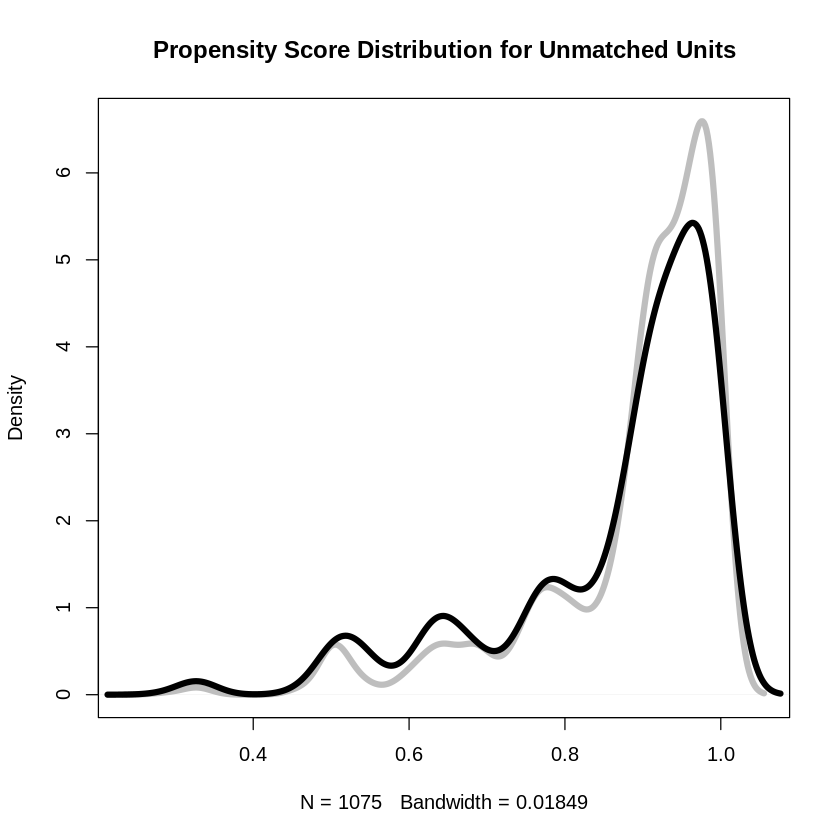

In [ ]:
# Kernel Density Plot
d <- density(males, ) # returns the density data
c <- density(females)
plot(d, main="Propensity Score Distribution for Unmatched Units", col='grey', lwd=5) # plots the results
lines(c, col='black', lwd=5)

In [ ]:
females_matched <- prop_scores[prop_mout$index.control]
males_matched <- prop_scores[prop_mout$index.treated]

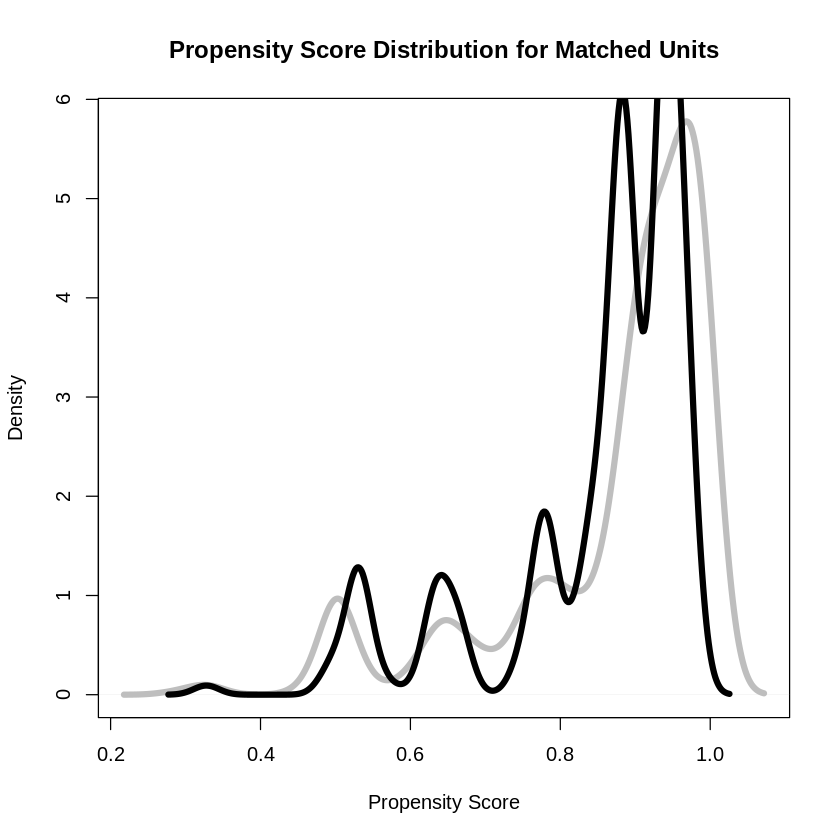

In [ ]:
# Kernel Density Plot
d <- density(males_matched) # returns the density data
c <- density(females_matched)
plot(d,  main="Propensity Score Distribution for Matched Units", xlab="Propensity Score", col="Grey", lwd=5) # plots the results
lines(c, lwd=5)

In [ ]:
females_matched <- prop_scores[gen_mout$index.control]
males_matched <- prop_scores[gen_mout$index.treated]

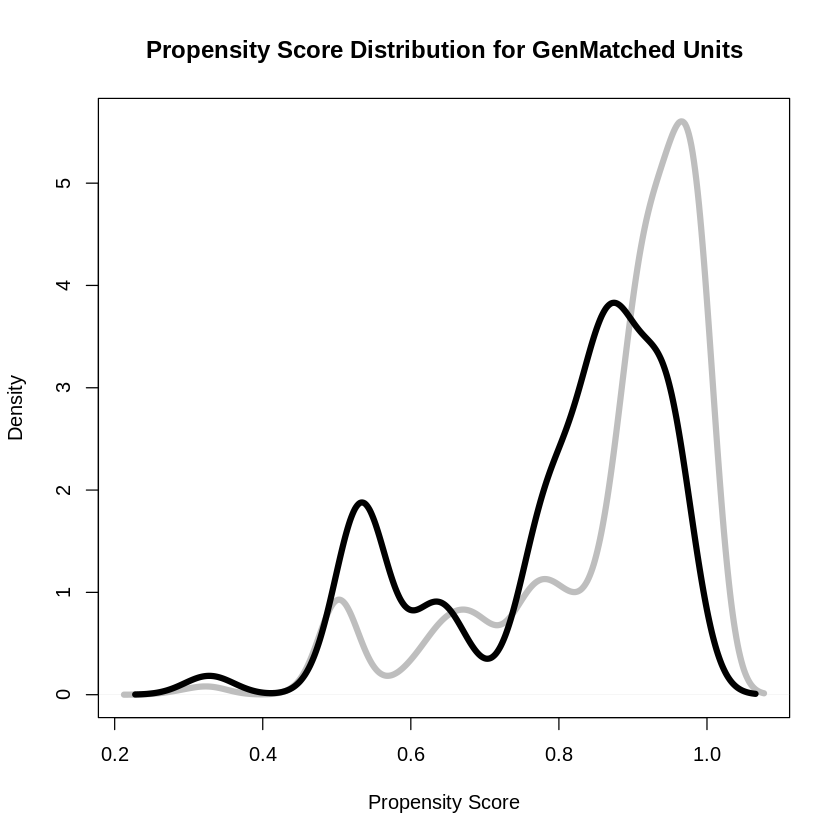

In [ ]:
# Kernel Density Plot
d <- density(males_matched) # returns the density data
c <- density(females_matched)
plot(d,  main="Propensity Score Distribution for GenMatched Units", xlab="Propensity Score", col="Grey", lwd=5) # plots the results
lines(c, lwd=5)